In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
source_freq = 100 #Hz, source frequency
df = pd.read_csv(r"C:\Users\Tomas\Desktop\Martin Group\3D_results\damping_1\data.csv")
df

,Unnamed: 0,E,E_calc_count,max_dm/dt,dE/dt,delta_E,E_zeeman,B_zeeman,Bx_zeeman,By_zeeman,...,iteration,stage_iteration,stage,mx,my,mz,last_time_step,t,ll,ll_rate
0,0,5.112230e-19,13.0,9.097304e+05,-8.589488e-08,8.710955e-20,-3.913061e-28,7.895789e-02,0.0,0.0,...,2.0,2.0,0.0,0.001725,-0.015065,0.001223,0.000003,0.00001,11.999946,0.000000
1,1,5.734292e-19,26.0,6.679987e+05,-6.794992e-08,1.947055e-19,-4.774179e-28,1.579127e-01,0.0,0.0,...,5.0,2.0,1.0,0.006805,-0.010465,0.000746,0.000003,0.00002,11.999980,3.378580
2,2,4.320103e-19,39.0,8.891034e+05,-4.756865e-08,-1.171506e-21,1.224405e-26,2.368612e-01,0.0,0.0,...,8.0,2.0,2.0,-0.007983,-0.034287,-0.012753,0.000003,0.00003,11.994145,-583.461472
3,3,4.133355e-19,52.0,1.139091e+06,-6.797543e-08,-1.152855e-19,-1.522387e-25,3.158004e-01,0.0,0.0,...,11.0,2.0,3.0,-0.056893,-0.156548,0.118928,0.000003,0.00004,11.490820,-50331.545208
4,4,3.767535e-19,65.0,1.093557e+06,-7.168210e-08,-6.384237e-20,4.267110e-25,3.947271e-01,0.0,0.0,...,14.0,2.0,4.0,0.038552,0.327117,-0.266691,0.000003,0.00005,9.439524,-205125.462253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49994,3.669236e-19,649935.0,1.788787e+06,-2.089706e-07,-6.362076e-22,2.583852e-25,3.158004e-01,0.0,0.0,...,149984.0,2.0,49994.0,0.215858,0.191037,0.201849,0.000003,0.49996,10.533247,-1424.550880
49995,49995,3.671789e-19,649948.0,1.788020e+06,-2.088409e-07,2.522729e-22,1.927823e-25,2.368612e-01,0.0,0.0,...,149987.0,2.0,49995.0,0.215101,0.190916,0.200792,0.000003,0.49997,10.548579,1533.130020
49996,49996,3.676938e-19,649961.0,1.787828e+06,-2.088444e-07,9.935308e-22,1.285204e-25,1.579127e-01,0.0,0.0,...,149990.0,2.0,49996.0,0.215048,0.190775,0.200783,0.000003,0.49998,10.548701,12.268161
49997,49997,3.676445e-19,649974.0,1.787195e+06,-2.085095e-07,1.183919e-21,6.417069e-26,7.895789e-02,0.0,0.0,...,149993.0,2.0,49997.0,0.214145,0.190877,0.200500,0.000003,0.49999,10.552797,409.614703


In [3]:
# FFT setup
from scipy.fft import fft, fftfreq
trange = [.2,.5]
#T = df['last_time_step'][0]
T = df['t'][1]-df['t'][0]

y = np.array(df['ll'][(df['t']>trange[0]) & (df['t']<trange[1])])
fft_ll = fft(y)
N = len(fft_ll)
x = np.linspace(0.0, N/T, N, endpoint=False)

xf = fftfreq(N, T)[:N//2]

PS = 2*np.abs(fft_ll[0:N//2])/N

C:\Users\Tomas\AppData\Local\Temp\ipykernel_7716\1236621789.py:6: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,0.05)


Text(0.5, 1.0, 'Model Amplitude Spectrum')

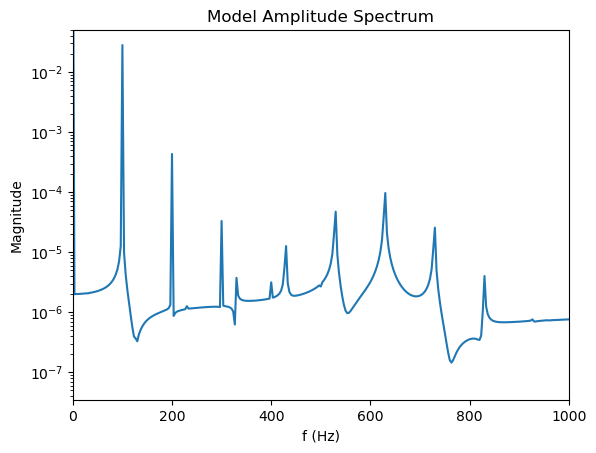

In [4]:
# Plot the amplitude spectrum
plt.semilogy(xf, PS, '-')
plt.xlabel('f (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0,10*source_freq)
plt.ylim(0,0.05)
plt.title('Model Amplitude Spectrum')
#plt.grid()

<Axes: xlabel='t'>

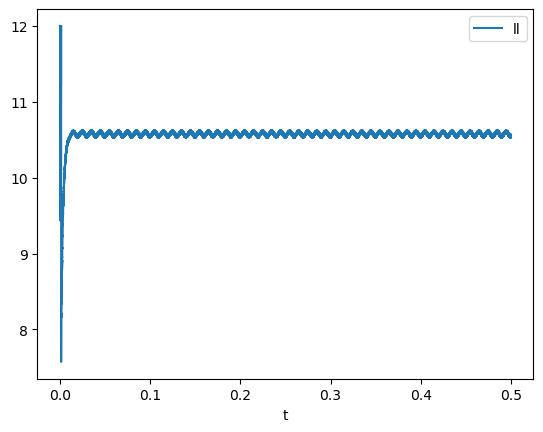

In [5]:
df.plot('t','ll')
#plt.ylim([-1.85,-1.75])
#plt.xlim([0.2,0.201])

In [6]:
#np.index(max(PS[1:]))
np.argmax(PS[1:], axis=None)

29

In [7]:
print('100Hz: ',PS[30])
print('200Hz: ',PS[60])

100Hz:  0.028139128726411423
200Hz:  0.0004327625408564488


In [8]:
peaks = [PS[30],PS[60]]
peaks

[0.028139128726411423, 0.0004327625408564488]

Text(0, 0.5, 'amplitude')

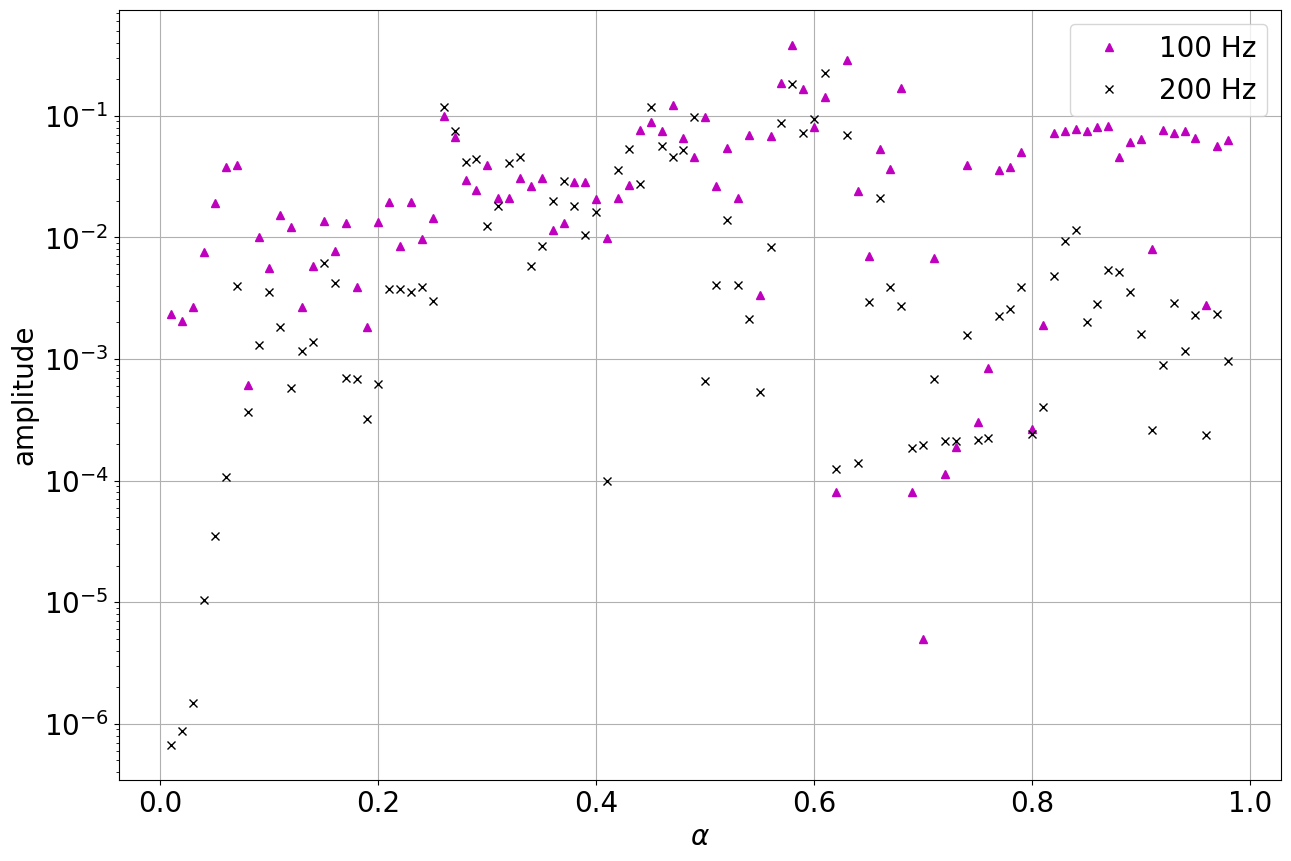

In [12]:
plt.figure(figsize=(15,10))
alpha = 0.01
#Happ = 0.01
#Temp = 233-273.15
for num in range(1,99):
    name = r"C:\Users\Tomas\Desktop\Martin Group\3D_results\damping2_"
    name1 = name + str(num) + '\peak_values.csv'
    df_new = pd.read_csv(name1)
#    plt.semilogy(Temp,df_new['Amplitude'][0],'bo',label='100 Hz')
#    plt.semilogy(Temp,df_new['Amplitude'][1],'rs',label='200 Hz')
#    plt.plot(Happ,df_new['Amplitude'][0],'bo',label='100 Hz')
#    plt.plot(Happ,df_new['Amplitude'][1],'rs',label='200 Hz')
#    plt.semilogy(Happ,df_new['Amplitude'][2],'k+',label='300 Hz')
    plt.semilogy(alpha,df_new['Amplitude'][0],'m^',label='400 Hz')
    plt.semilogy(alpha,df_new['Amplitude'][1],'kx',label='500 Hz')
    #Happ += .01
    alpha += .01
    Temp += 1
    
plt.xlabel(r'$\alpha$',size=20)
#plt.legend(['100 Hz','200 Hz','300 Hz','400 Hz','500 Hz'],fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.xlabel(r'$H_{app}$ (A/m)',size=20)
#plt.xlabel(r'temperature ($\degree$C)',size=20)
plt.legend(['100 Hz','200 Hz'],fontsize=20)
plt.grid()
plt.ylabel('amplitude',size=20)